In [1]:
# Polynomial Regression on Bitcoin dataset

__author__ = 'Prof.D'


In [2]:
# Importing core libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

np.random.seed(42)


In [3]:
# Importing dataset
df = pd.read_csv(r'coindesk-bpi-USD-close_data-2010-07-17_2018-08-01.csv')


In [4]:
# Simple numeric encoding of 'Date' variable
df['Date'] = np.arange(len(df['Date']))


In [5]:
# Features and labels
X = df['Date'].values
y = df['Close Price'].values


In [6]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


In [7]:
# Defining model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures()
regressor = Ridge(solver='cholesky', random_state=42)

steps = [('feature_preprocessing', poly_features), 
         ('regressor', regressor)]

regression_pipeline = Pipeline(steps)


In [17]:
# Finding best params w/ Grid search
from sklearn.model_selection import GridSearchCV

params = [{'feature_preprocessing__degree': [5, 6, 7, 8, 9], 
           'regressor__alpha': np.arange(1001)}]

grid_search = GridSearchCV(regression_pipeline, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))


{'feature_preprocessing__degree': 9, 'regressor__alpha': 990} 969.101434378


C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2754891609984027e-62 / 1.1102230246251565e-16
  RuntimeWarning)


In [19]:
# Fitting model w/ best params to data
#[9, 990] --> 969.10
poly_features = PolynomialFeatures(degree=9)
regressor = Ridge(solver='cholesky', random_state=42, alpha=990)

steps = [('feature_preprocessing', poly_features), 
         ('regressor', regressor)]
regression_pipeline = Pipeline(steps)
regression_pipeline.fit(X_train, y_train)


C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2754891609984027e-62 / 1.1102230246251565e-16
  RuntimeWarning)


Pipeline(memory=None,
     steps=[('feature_preprocessing', PolynomialFeatures(degree=9, include_bias=True, interaction_only=False)), ('regressor', Ridge(alpha=990, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001))])

In [20]:
# Evaluating model's performace
#On training set
from sklearn.model_selection import cross_val_score
y_scores_train = cross_val_score(regression_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
y_scores_train = np.sqrt(-y_scores_train)
mean_train, std_train = y_scores_train.mean(), y_scores_train.std()
print(mean_train, std_train)

#On testing data
y_scores_test = cross_val_score(regression_pipeline, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
y_scores_test = np.sqrt(-y_scores_test)
mean_test, std_test = y_scores_test.mean(), y_scores_test.std()
print(mean_test, std_test)

#[9, 990] --> train: [967.045349394, 63.1777595426], test: [1307.05557098, 318.871234368]
#[12, 456] --> train: [872.323319907, 57.067465454], test: [6.32299455297e+15, 9.43551421307e+15]

967.045349394 63.1777595426
1307.05557098 318.871234368


C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.956761725034634e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.216850577871599e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1177177088522075e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pro

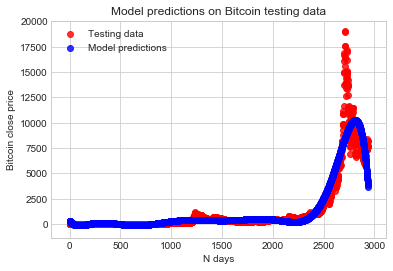

In [21]:
# Visualizing training set results
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_train, y_train, c='r', alpha=0.8, label='Testing data')
ax.scatter(X_train, regression_pipeline.predict(X_train), c='b', alpha=0.8, label='Model predictions')
ax.set_title('Model predictions on Bitcoin testing data')
ax.set_xlabel('N days')
ax.set_ylabel('Bitcoin close price')
ax.legend()
plt.show()



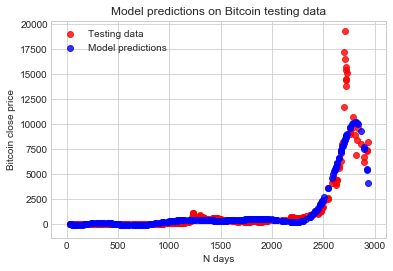

In [22]:
# Visualizing test set results
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_test, y_test, c='r', alpha=0.8, label='Testing data')
ax.scatter(X_test, regression_pipeline.predict(X_test), c='b', alpha=0.8, label='Model predictions')
ax.set_title('Model predictions on Bitcoin testing data')
ax.set_xlabel('N days')
ax.set_ylabel('Bitcoin close price')
ax.legend()
plt.show()


C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.879378518646292e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6525775465434478e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\pytho

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1316031866995703e-60 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1207666493285035e-60 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.111180618539882e-60 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pr

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.97324677301876e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.973246237092228e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.39718910469703e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.340236882368581e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.340233196860122e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.337909919721907e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2436634004750036e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2436454602856804e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2425773382498882e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\P

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7979159270671674e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7972517650212606e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.796989623069589e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pr

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4853147245411382e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.48485873636412e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4843713499570963e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pro

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2932316724497319e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2928711731768215e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2926831503956381e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\P

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1417423685371596e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1414694896961267e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1413712135924894e-61 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\P

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.37421897779348e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.372070824378612e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.369924662902459e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.817949494527134e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.816321102873475e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.815005448644804e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.093414847732992e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.092071225133778e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.090722360970329e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.510322067475019e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.509903212364121e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.509533154138822e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.036156011650384e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.035175926774713e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.034210482546904e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.658252989941784e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.6574180880420006e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.656563783961858e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pro

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.400170336989596e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.399415657334763e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.399148430791611e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.143734761817448e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.1430461174932785e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.142938193269638e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pro

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.847329441718287e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.847329316359699e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.846732346443673e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.759740997507309e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.759371186124935e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.758804419834452e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.525730577267123e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.525220362868551e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.524705487770948e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.323833632644723e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.323368245983003e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.322913437726662e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.122675080569915e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1222450307554905e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.121823406509223e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pro

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.007874575649527e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.997439559044302e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.997039626309543e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6866615720338213e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.686301355051851e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.685941512473194e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pro

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5633409147525635e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5630096330493283e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.562675446089265e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pr

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4270740685866417e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4267610561496706e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4264533706735105e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\P

C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2781513346925864e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.278095171613456e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Prof.D\Downloads\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2778151387760465e-62 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Pr

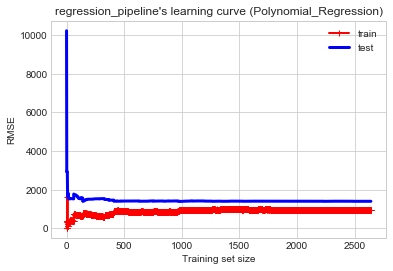

In [23]:
# Visualzing model's learning curve
from sklearn.metrics import mean_squared_error
      
def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, estimator_name, algo):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        estimator.fit(X_train[:m], y_train[:m])
        y_train_pred = estimator.predict(X_train[:m])
        y_test_pred = estimator.predict(X_test)
        train_errors.append(mean_squared_error(y_train_pred, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_pred, y_test))
      
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    ax.plot(np.sqrt(test_errors), 'b-', linewidth=3, label='test')
    ax.set_xlabel('Training set size')
    ax.set_ylabel('RMSE')
    title='{}\'s learning curve'.format(estimator_name)
    ax.set_title('{} ({})'.format(title, algo))
    ax.legend()
    plt.savefig('{} ({})'.format(title, algo))

plot_learning_curve(regression_pipeline, X_train, y_train, X_test, y_test, estimator_name='regression_pipeline', algo='Polynomial_Regression')


In [24]:
# Saving model
from sklearn.externals import joblib
joblib.dump(regression_pipeline, 'bitcoin_polynomial_regression.pkl')


['bitcoin_polynomial_regression.pkl']